# Kinase Domain Sequences

This notebook shows how to retrieve the amino acid sequence of kinase domains.

## Content

1. From Uniprot

## 1. From Uniprot

In [1]:
import math
import pandas as pd
from tqdm import tqdm
from kinoml.core.sequences import KinaseDomainAminoAcidSequence

Sequences are retrieved by querying the [Uniprot proteins API](https://www.ebi.ac.uk/proteins/api/doc/). You can provide single or mutliple identifiers. In case a kinase has multiple domains, multiple sequences will be returned.

In [2]:
# multiple Uniprot identifiers
sequences = KinaseDomainAminoAcidSequence.from_uniprot("P04629", "Q96GX5")
print(f"Number of kinase domains: {len(sequences)}")

Number of kinase domains: 2


In [3]:
# multiple kinase domains in one kinase
sequences = KinaseDomainAminoAcidSequence.from_uniprot("A0A010QB14")
print(f"Number of kinase domains: {len(sequences)}")

Number of kinase domains: 2


`KinaseDomainAminoAcidSequence` is a subclass of `Biosequence` and stores a `name` and a `metadata` dictionary.

In [4]:
# single kinase domain in one kinase
sequence = KinaseDomainAminoAcidSequence.from_uniprot("P04629")
print(f"Kinase name: {sequence.name}")
print(f"Sequence metadata: {sequence.metadata}")

Kinase name: NTRK1_HUMAN
Sequence metadata: {'uniprot_id': 'P04629', 'begin': 510, 'end': 781, 'true_N_terminus': False, 'true_C_terminus': False}


Let's check how many kinase domains we find in a collection of kinases.

In [5]:
url = "https://raw.githubusercontent.com/openkinome/datascripts/more-kinases/data/human_kinases.aggregated.csv"
kinases = pd.read_csv(url, index_col=0)
kinases

,UniprotID,Name,kinhub,klifs,pkinfam,reviewed_uniprot,dunbrack_msa
0,A0A0B4J2F2,SIK1B,False,False,True,True,True
1,A2A3N6,PIPSL,False,False,False,True,False
2,A2RU49,HYKK,False,False,False,True,False
3,A4D2B8,PM2P1,False,False,False,True,False
4,A4QPH2,PI4KAP2|PI4P2,False,True,False,True,False
...,...,...,...,...,...,...,...
756,Q9Y6K8,KAD5,False,False,False,True,False
757,Q9Y6M4,KC1G3|CSNK1G3,True,True,True,True,True
758,Q9Y6R4,M3K4|MAP3K4,True,True,True,True,True
759,Q9Y6S9,RPKL1|RPS6KL1,True,True,True,True,True


Actually, we could pass the Uniprot identifiers all at once. But we want wo have a progress bar and there is no speed difference.

In [6]:
kinase_domains = []
num_kinases = len(kinases)
for uniprot_id in tqdm(kinases.UniprotID):
    kinase_domains.append(KinaseDomainAminoAcidSequence.from_uniprot(uniprot_id))

100%|██████████| 761/761 [08:56<00:00,  1.42it/s]


In [7]:
# statistics
no_domain = [kinase_domain for kinase_domain in kinase_domains if kinase_domain is None]
print(f"{len(no_domain)} entries do not have a kinase domain according to Uniprot.")
one_domain = [kinase_domain for kinase_domain in kinase_domains if isinstance(kinase_domain, str)]
print(f"{len(one_domain)} entries have exactly one kinase domain according to Uniprot.")
multiple_domains = [kinase_domain for kinase_domain in kinase_domains if isinstance(kinase_domain, list)]
print(f"{len(multiple_domains)} entries have more than one kinase domain according to Uniprot.")
true_N_terminus = [kinase_domain for kinase_domain in one_domain if kinase_domain.metadata["true_N_terminus"] == True]
print(f"{len(true_N_terminus)} kinase domains have a true N terminus according to Uniprot.")
true_C_terminus = [kinase_domain for kinase_domain in one_domain if kinase_domain.metadata["true_C_terminus"] == True]
print(f"{len(true_C_terminus)} kinase domains have a true C terminus according to Uniprot.")

287 entries do not have a kinase domain according to Uniprot.
474 entries have exactly one kinase domain according to Uniprot.
0 entries have more than one kinase domain according to Uniprot.
2 kinase domains have a true N terminus according to Uniprot.
16 kinase domains have a true C terminus according to Uniprot.


The information about the termini might be important to decide if a terminus should be charged or capped during kinase modeling. Next let's find out how long the kinase domains are.

Maximal length of a kinase domain is 801 according to Uniprot.
Minimal length of a kinase domain is 168 according to Uniprot.


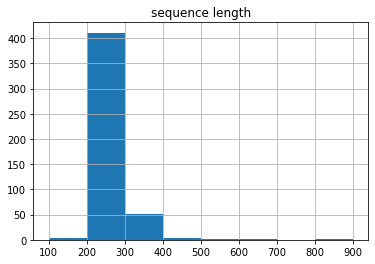

In [8]:
max_length = max([len(kinase_domain) for kinase_domain in one_domain])
print(f"Maximal length of a kinase domain is {max_length} according to Uniprot.")
min_length = min([len(kinase_domain) for kinase_domain in one_domain])
print(f"Minimal length of a kinase domain is {min_length} according to Uniprot.")
bins = [x * 100 for x in range(math.floor(min_length/100), math.ceil(max_length/100) + 1)]
hist = pd.DataFrame({"sequence length": [len(kinase_domain) for kinase_domain in one_domain]}).hist(bins=bins)

The longest kinase domain is found for [Q96GX5](https://www.uniprot.org/uniprot/Q96GX5). [5LOH](https://www.rcsb.org/structure/5LOH) (x-ray of Q96GX5) suggests a big insertion within the kinase domain.